### OTSU Thresholding

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Cargar la Imagen y Convertirla a Escala de Grises
Se carga una imagen y se convierte a escala de grises para reducir la complejidad y facilitar el procesamiento. La conversión permite que los métodos de umbralización y los ruidos sean aplicados sin los matices de color, lo que simplifica la segmentación y el análisis de la estructura de la imagen.

In [14]:
# Cargar la imagen en escala de grises
image = cv2.imread('er.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

### Aplicar Umbralización de Otsu
En este bloque se emplea la umbralización de Otsu, una técnica que calcula un valor de umbral óptimo de manera automática. Este método es especialmente útil para separar regiones claras y oscuras en imágenes en escala de grises. Para facilitar la comparación, se visualizan tres imágenes: la original en color, la imagen en escala de grises, y la imagen resultante de la umbralización de Otsu.


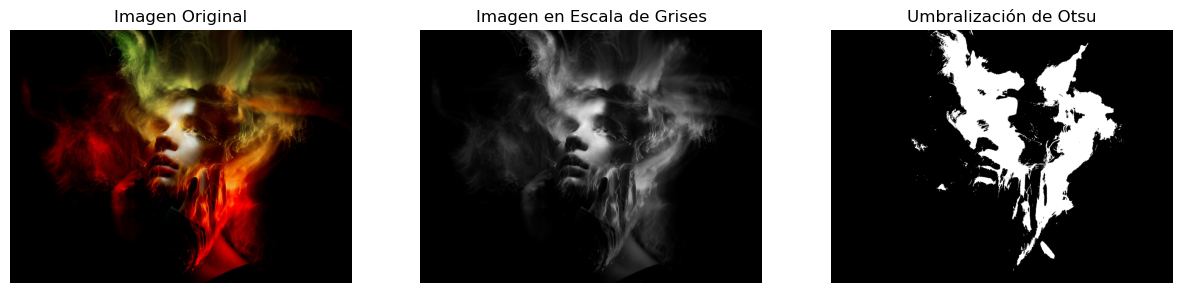

In [15]:
# Aplicar el método de umbralización de Otsu
_, umbral_otsu = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(15, 5))

# Imagen en color original
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(umbral_otsu, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()

### Agregar Ruido Gaussiano
**num_salt = int(np.ceil(prob * imagen.size * 0.5))**: Calcula el número de píxeles que serán alterados a "sal" (blancos). `imagen.size` es el número total de píxeles en la imagen, y el `0.5` indica que se aplicará la mitad de los cambios para "sal".

**num_pepper = int(np.ceil(prob * imagen.size * 0.5))**: Similar a `num_salt`, calcula el número de píxeles que serán alterados a "pimienta" (negros), aplicando la otra mitad de los cambios.

**salt_coords = (np.random.randint(0, imagen.shape[0], num_salt), np.random.randint(0, imagen.shape[1], num_salt))**: Genera coordenadas aleatorias para los puntos de "sal" en la imagen. `np.random.randint` selecciona valores de fila y columna aleatorios dentro del tamaño de la imagen para colocar los puntos blancos.

**imagen_ruido[salt_coords] = 255**: Asigna el valor 255 (blanco) a los píxeles en las coordenadas seleccionadas para "sal", agregando puntos blancos a la imagen.

**pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper), np.random.randint(0, imagen.shape[1], num_pepper))**: Genera coordenadas aleatorias para los puntos de "pimienta" en la imagen de manera similar a los puntos de "sal".

**imagen_ruido[pepper_coords] = 0**: Asigna el valor 0 (negro) a los píxeles en las coordenadas seleccionadas para "pimienta", agregando puntos negros a la imagen.

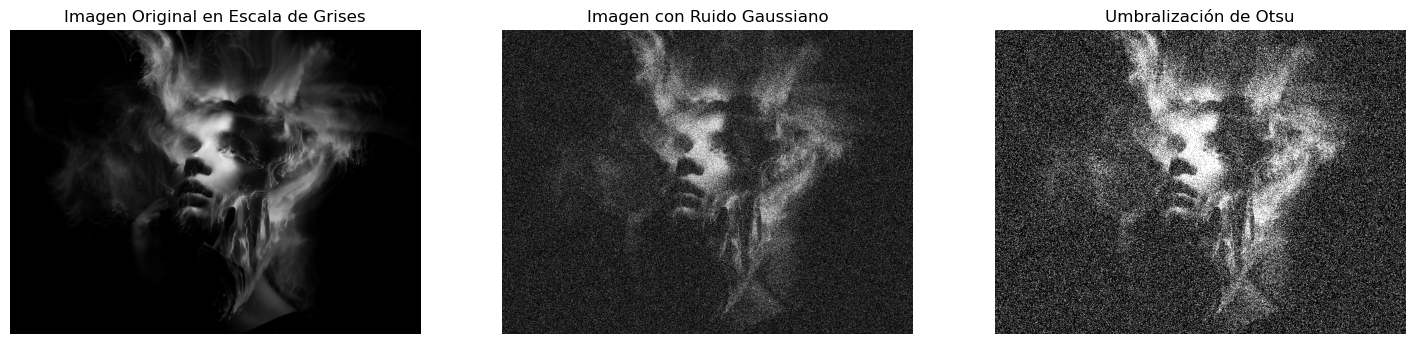

In [16]:
# Función para agregar ruido gaussiano
def agregar_ruido_gaussiano(imagen, mean=0, var=0.1):
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, imagen.shape)
    imagen_ruido = imagen + gauss * 255
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = agregar_ruido_gaussiano(gray_image)

# Aplicar el método de umbralización de Otsu
_, imagen_otsu_gaussiana = cv2.threshold(imagen_ruido_gaussiano, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido Gaussiano
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_gaussiano, cmap='gray')
plt.title('Imagen con Ruido Gaussiano')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(imagen_otsu_gaussiana, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()


### Agregar Ruido Exponencial Multiplicativo
**expo = np.random.exponential(scale, imagen.shape)**: Genera una matriz de ruido exponencial con la misma forma que la imagen, usando `np.random.exponential`. Los valores en la matriz siguen una distribución exponencial con una escala específica (`scale`).

**imagen_ruido = imagen * expo**: Multiplica la imagen original por el ruido exponencial, afectando los valores de los píxeles y generando una imagen con ruido aplicado.

**imagen_ruido = imagen_ruido / np.max(imagen_ruido) * 255**: Normaliza la imagen ruidosa dividiendo por su valor máximo y multiplicando por 255, para que los valores resultantes estén en el rango de intensidad de 0 a 255.

**imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)**: Asegura que todos los valores de píxeles estén dentro del rango válido (0 a 255) usando `np.clip`, y convierte la imagen resultante al tipo `uint8` para que pueda ser guardada o visualizada correctamente.


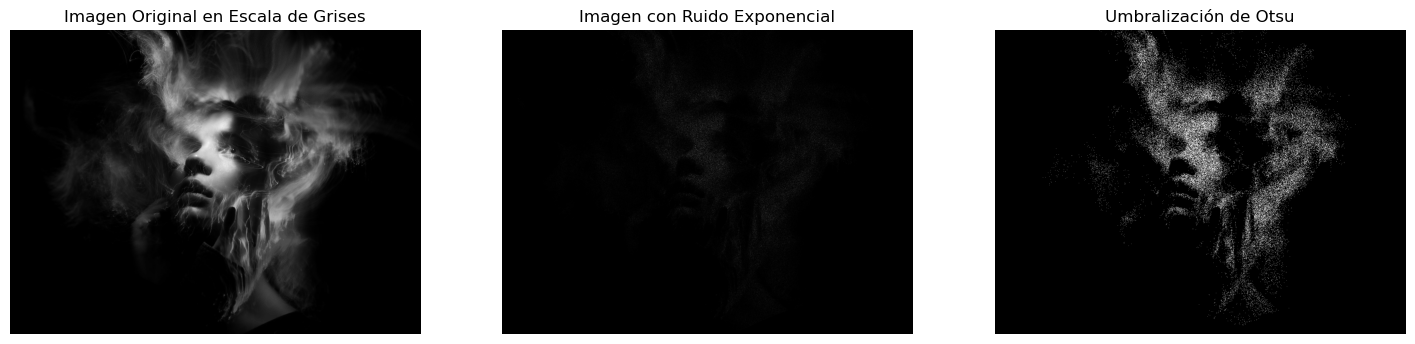

In [17]:
# Función para agregar ruido exponencial multiplicativo
def agregar_ruido_exponencial(imagen, scale=5):
    expo = np.random.exponential(scale, imagen.shape)
    imagen_ruido = imagen * expo
    imagen_ruido = imagen_ruido / np.max(imagen_ruido) * 255
    imagen_ruido = np.clip(imagen_ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

# Aplicar el ruido exponencial a la imagen en escala de grises
imagen_ruido_exponencial = agregar_ruido_exponencial(gray_image)

# Aplicar el método de umbralización de Otsu
_, imagen_otsu_exponencial = cv2.threshold(imagen_ruido_exponencial, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original, la imagen con ruido exponencial y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido exponencial
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_exponencial, cmap='gray')
plt.title('Imagen con Ruido Exponencial')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(imagen_otsu_exponencial, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()



### Agregar Ruido de Sal y Pimienta
Finalmente, se añade ruido de sal y pimienta a la imagen. Este tipo de ruido reemplaza aleatoriamente algunos píxeles con valores máximos (blanco) y mínimos (negro), imitando el efecto de partículas blancas y negras en la imagen. 

Este tipo de ruido es útil para probar la robustez de métodos de procesamiento de imagen ante datos corruptos. El bloque también aplica la umbralización de Otsu para analizar cómo esta técnica responde a la imagen con ruido de sal y pimienta. 

La visualización incluye la imagen original en escala de grises, la imagen con ruido y la imagen umbralizada.


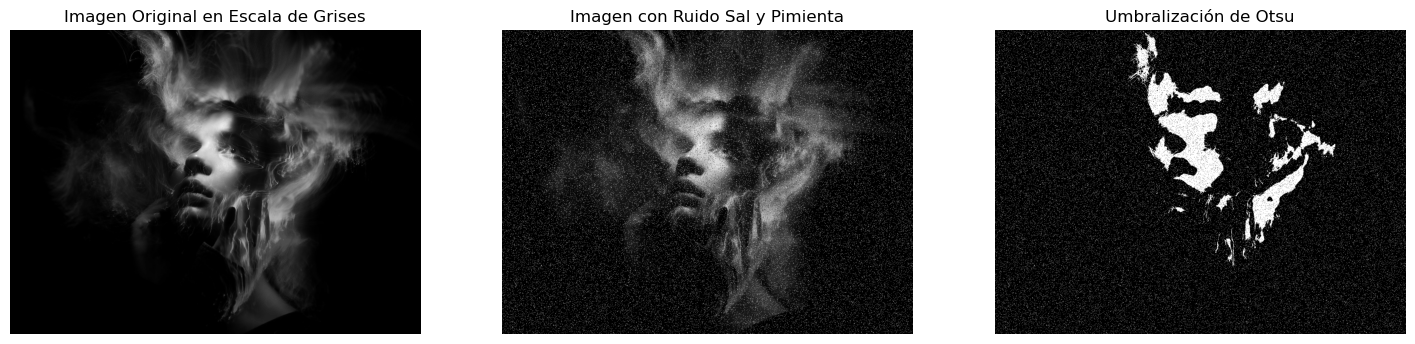

In [18]:
# Función para agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = 255  # Blanco para 'sal'

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = 0  # Negro para 'pimienta'

    return imagen_ruido

# Aplicar el ruido sal y pimienta a la imagen en escala de grises
imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(gray_image)

# Aplicar el método de umbralización de Otsu
_, imagen_otsu_sal_pimienta = cv2.threshold(imagen_ruido_sal_pimienta, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar la imagen original, la imagen con ruido de sal y pimienta y la imagen umbralizada
plt.figure(figsize=(18, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Imagen con ruido sal y pimienta
plt.subplot(1, 3, 2)
plt.imshow(imagen_ruido_sal_pimienta, cmap='gray')
plt.title('Imagen con Ruido Sal y Pimienta')
plt.axis('off')

# Imagen umbralizada con Otsu
plt.subplot(1, 3, 3)
plt.imshow(imagen_otsu_sal_pimienta, cmap='gray')
plt.title("Umbralización de Otsu")
plt.axis("off")

plt.show()


### Comparación de todos los resultados


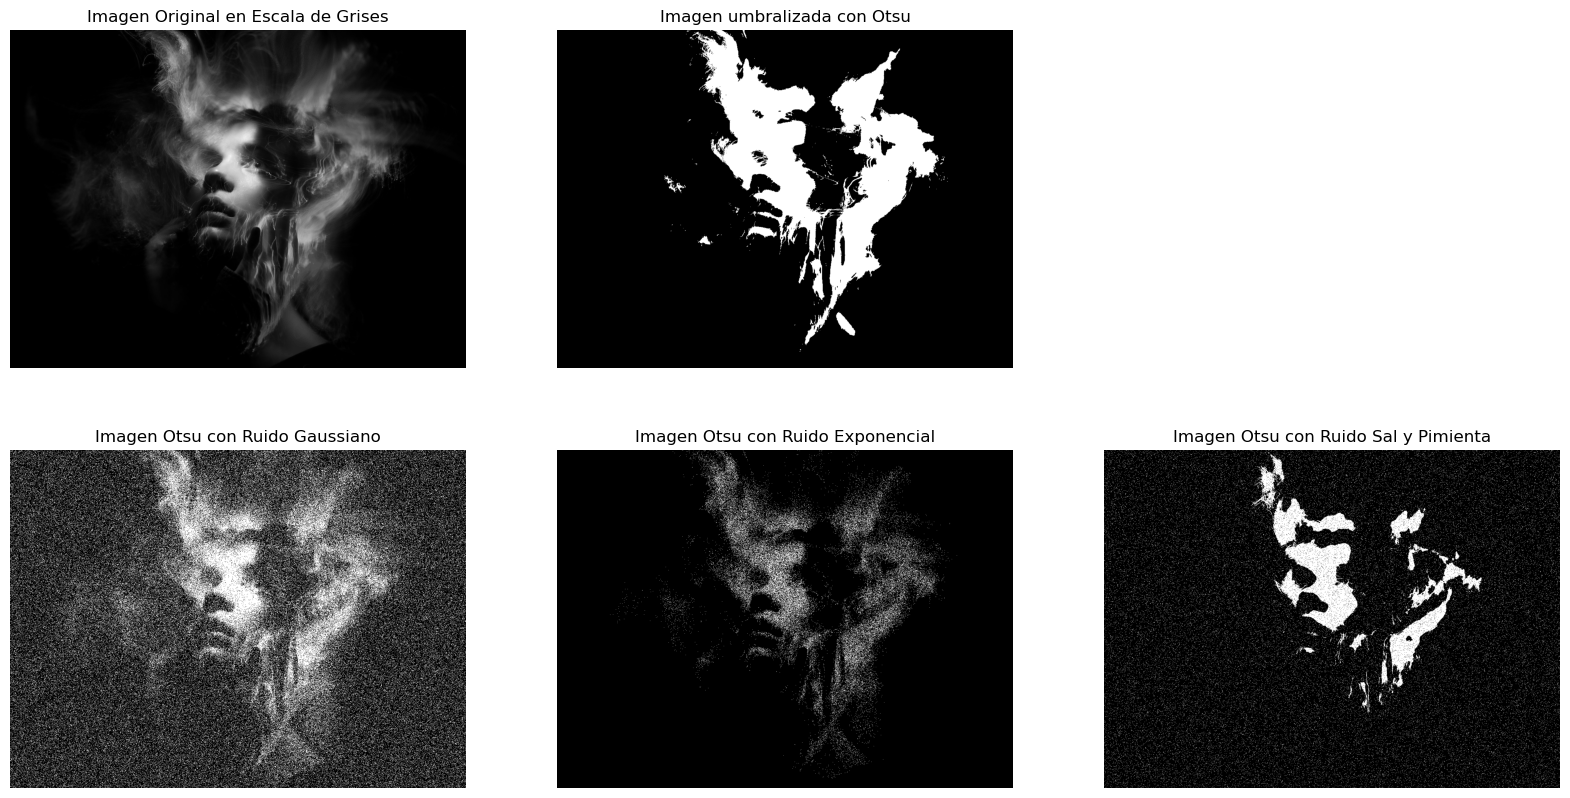

In [19]:
# Mostrar la imagen original, las bandas binarias y la imagen clasificada final
plt.figure(figsize=(20, 10))

# Mostrar la imagen original en la primera posición (arriba)
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

# Mostrar la imagen clasificada final en la segunda posición (arriba)
plt.subplot(2, 3, 2)
plt.imshow(umbral_otsu, cmap='gray')
plt.title('Imagen umbralizada con Otsu')
plt.axis('off')

# Mostrar las bandas binarias en la fila inferior
plt.subplot(2, 3, 4)
plt.imshow(imagen_otsu_gaussiana, cmap='gray')
plt.title('Imagen Otsu con Ruido Gaussiano')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(imagen_otsu_exponencial, cmap='gray')
plt.title('Imagen Otsu con Ruido Exponencial')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(imagen_otsu_sal_pimienta, cmap='gray')
plt.title('Imagen Otsu con Ruido Sal y Pimienta')
plt.axis('off')

plt.show()